# **Quantum Coin Game**

---



### **Table of Contents**
---

1. [Introduction](#introduction)<br>
   1.1 [What is Quantum Coin Game](#quantum_definition)<br>
   1.2 [Concept](#concept)<br>
   1.3 [Idea](#idea)<br>
   1.4 [Rules of the Game](#rules)<br>
2. [Analogy](#analogy)<br>
3. [Approach](#approach)<br>
4. [Optimal Strategy](#optimal)<br>
   4.1 [Play it with Qiskit](#quantum_play)<br>
   4.2 [Measurement](#quantum_measurement)<br>
   4.3 [QASM Simulator](#quantum_qasm)<br>
   4.4 [Who Wins?](#quantum_wins)<br>
   4.5 [Running on Quantum Computer](#real_qc)<br>
5. [Conclusion](#conclusion)<br>
6. [References](#references)<br>
7. [Quick Exercise](#quick_exercise)<br>
8. [Version Information](#version_information)

### **Introduction** <a id="introduction"></a>

---


### What is Quantum Coin Game ? <a id="quantum_definition"></a>
 Quantum Coin Game is one of the fundamental concept of quantum computing, which uses simple implementation of quantum gates or more precisely uses the wierdness of quantum mechanics, to win about 97% of the time, when played against an opponent. Flipping of coin and say heads or tails.

### Where the concept came from ? <a id="concept"></a>
 The concept of Quantum Coin Game came from the idea of classical coin game which can only show heads and tails. But since the game utilizes the concepts of quantum mechanics, it would be interesting to see what could be the outcome of the whole experiment.

### What is the main idea of this game ? <a id="idea"></a>
 The main concept of this game is how the quantum computer uses the power of **QUANTUM SUPERPOSITION**, which tells an object can exists in 2 different states at the same time, to win absolutely everytime. The fact is an quantum computer can do superposition already puts it in a higher chance of winning over the classical flip.

 **NOTE**: To learn more about quantum superposition, link to "[Qiskit Textbook](https://qiskit.org/textbook/ch-states/representing-qubit-states.html)" superposition page.

### What are the rules of this game ? <a id="rules"></a>
 1. Quantum Computer plays a move but it is not revealed to the Opponent(Human).
 2. Opponent(Human) plays a move and it is also not revealed to the Quantum Computer.
 3. Finally Quantum Computer plays a move.
 4. Results are shown. If its heads, then Quantum Computer wins. Else, Opponent(Human) wins.
 
**NOTE**: "Playing a move" refers to "Flipping the coin" and we consider the coin as **FAIR COIN**.

**NOTE**: Refer to [Sohini's Ted Talk](#conclusion)

---




### **Analogy** <a id="analogy"></a>

---

Now that we know what is a quantum coin game, what is it based on and most importantly what are the rules of this game, lets convert the concept of this game in quantum computing terminology.

* The 'coin' in flipping a coin we referring here is a 'single qubit gate'.
$$
      |\psi\rangle=\begin{bmatrix}\alpha \\ \beta\end{bmatrix}
$$

  where $\alpha, \beta \in \mathbb{C}$ and $|\alpha|^2 + |\beta|^2 = 1$


* "Flipping" the coin is application of the bit-flip operator

$$
  X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

* The "heads" state is defined as 
$$
|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$$ and "tails" as 
$$
|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

* The quantum computer "plays" by applying the Hadamard $H$ operator 
$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix}  1 & 1 \\ 1 & -1 \end{bmatrix}
$$


### **Approach** <a id="approach"></a>

---
Lets see how to approach the game in quantum computing terminology-

* The coin is initialized to the $|0\rangle$ "heads" state.

* The computer plays, applying the Hadamard $H$ operator to the coin (operators are applied using matrix multiplication). 
$$
H|0\rangle = \frac{1}{\sqrt2}(|0\rangle + |1\rangle)
$$
The coin enters the 
$$
H|0\rangle = |+\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix}  1 \\ 1 \end{bmatrix}
$$
state.


* The human plays, choosing whether to flip the coin (apply the $X$ operator) or do nothing (apply the $I$ operator). However, since the $X$ operator just flips the state vector upside down, $X$ has no effect. Same goes for $I$.
$$
X|+\rangle=|+\rangle 
$$
$$
I|+\rangle=|+\rangle 
$$
No matter what, the state is $|+\rangle$ after the human plays.

* The computer plays, applying the Hadamard $H$ operator again, taking the coin to the $|0⟩$ "heads" state.
$$
H|+\rangle = |0\rangle
$$

In [124]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [107]:
# Importing all the necessary library

import random
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, assemble, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
import qiskit.tools.jupyter
from qiskit_textbook.widgets import plot_bloch_vector_spherical
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_state_qsphere
import ipywidgets as widgets

In [108]:
# Building the initial circuit

def initial_circuit():
    circuit = QuantumRegister(1, 'circuit')
    measure = ClassicalRegister(1, 'result')
    qc = QuantumCircuit(circuit, measure)
    qc.draw('mpl')
    return qc, circuit, measure

In [109]:
# Widget Initialization

gate = widgets.Dropdown(
    options=[('Identity', 'i'), ('Bit Flip', 'x')],
    description='Choice: ',
    disabled=False,
)

### **Optimal Strategy** <a id="optimal"></a>

Using the above approach the possibility table reduces to-


Start State  | Quantum  | Classical  | Quantum  | Result          | Who wins?
-------------|----------|------------|----------|-----------------|-----------
$|0\rangle$  | $H$      | $I$        | $H$      | $|0\rangle$     | Quantum
$|0\rangle$  | $H$      | $X$        | $H$      | $|0\rangle$     | Quantum

Now lets look at the possibilities-


1. Quantum Computer Wins ( $|0\rangle$ ):

$$
\frac{2}{2} = 100 \%
$$

2. Classical Human Wins ( $|1\rangle$ ):

$$
  \frac{0}{2} = 0 \%
$$

3. Either Quantum Computer or Classical Human Wins ( $|0\rangle + |1\rangle$ ):

$$
  \frac{0}{2} = 0 \%
$$

This table shows the quantum computer wins $100\%$ of the time. But actually it is $~97\%$, due to certain error.

### **Lets play this version using Qiskit** <a id="quantum_play"></a>

#### Building the initial circuit

In [110]:
qc, circuit, measure = initial_circuit()

#### **Turn 1. Quantum Computer**

Quantum Computer uses Hadamard $H$ on its first turn

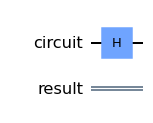

In [111]:
# Use H Gate

qc.h(circuit[0])
qc.draw('mpl')

#### **Turn 2. Classical Human**

In [112]:
gate

Dropdown(description='Choice: ', options=(('Identity', 'i'), ('Bit Flip', 'x')), value='i')

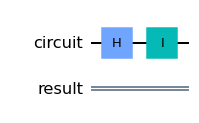

In [113]:
if gate.value == 'i':
    qc.i(circuit[0])
if gate.value == 'x':
    qc.x(circuit[0])

qc.draw('mpl')

#### **Turn 3. Quantum Computer**

Quantum Computer uses Hadamard $H$ on its first turn

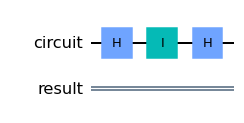

In [114]:
# Used H Gate

qc.h(circuit[0])
qc.draw('mpl')

#### **Measurement** <a id="quantum_measurement"></a>

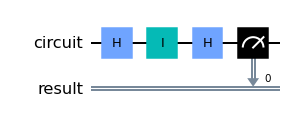

In [115]:
qc.measure(circuit, measure)
qc.draw('mpl')

#### **QASM_Simulator** <a id="quantum_qasm"></a>

{'0': 8192}


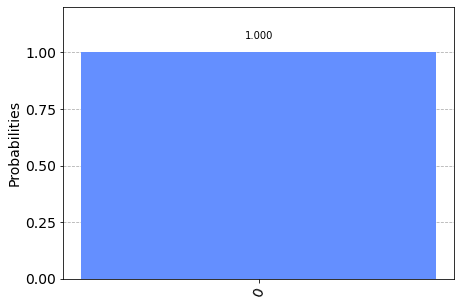

In [116]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
res = job.result().get_counts()
print(res)
plot_histogram(res)

#### **Lets see who wins** <a id="quantum_wins"></a>

In [120]:
if len(res_count) == 1 and list(res_count.keys())[0] == '0':
    print("Quantum Computer Wins")
if len(res_count) == 1 and list(res_count.keys())[0] == '1':
    print("Classical Human Wins")
if len(res_count) == 2:
    print("Either Quantum Computer or Classical Human Wins")

Quantum Computer Wins


#### **Running on Quantum Computer** <a id="real_qc"></a>

In [117]:
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-09-16 13:31:36,416: Credentials are already in use. The existing account in the session will be replaced.


{'0': 7498, '1': 694}


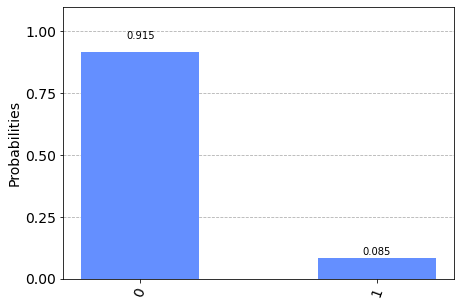

In [119]:
backend_real = provider.get_backend('ibmq_armonk')
job_real = execute(qc, backend_real, shots=8192)
res_real = job_real.result().get_counts()
print(res_real)
plot_histogram(res_real)

#### **Quantum Computer Wins all the time.**

---

### **Conclusion** <a id="conclusion"></a>

This simple and yet fun little game shows the basic quantum states $|0\rangle$, $|1\rangle$, $|+\rangle$ and $|−\rangle$, plus the common ways of moving between them with the $X$, $H$, $I$, $Z$ gates. 

### **References** <a id="references"></a>

This notebook is inspired from:

 * [1]. [Ted talk by Sohini Ghosh](https://www.ted.com/talks/shohini_ghose_a_beginner_s_guide_to_quantum_computing#t-208006). 

 * [2]. Quantum Coin Flipping from [Wikipedia](https://en.wikipedia.org/wiki/Quantum_coin_flipping)

#### **Quick Exercise** <a id="quick_exercise"></a>

The rules of the game we learned so far are the main rules of the game.
But, think of other variations of the game as well, tweak the game a little could result in significant change in answer. Such as-

1. What if, instead of quantum computer taking first turn, the classical human take the first turn ?
2. What if, instead of representing head as $|0\rangle$, the tail is represented as $|0\rangle$ ?
3. What if, instead of using fair coin, we used unfair coin ?
4. What if, instead of playing against a classical human, the quantum computer plays with another quantum computer ?
5. What if, instead of having 3 turns, there are $n$ number of turns ?
6. What if, instead of using all gates, restrict the use of some gates ?

and many more variations are possible.

### **Version Information** <a id="version_information"></a>

In [121]:
%qiskit_version_table

/opt/conda/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


Qiskit Software,Version
qiskit-terra,0.18.1
qiskit-aer,0.8.2
qiskit-ignis,0.6.0
qiskit-ibmq-provider,0.16.0
qiskit-aqua,0.9.4
qiskit,0.29.0
qiskit-nature,0.1.5
qiskit-finance,0.2.0
qiskit-optimization,0.2.1
qiskit-machine-learning,0.2.0
